In [199]:
# Created By: Mandar R. Gogate
# Created On : 10/29/2019
# References
# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
# https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888
# https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
# https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
# https://stackoverflow.com/questions/26358200/xticks-by-pandas-plot-rename-with-the-string
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting
# https://stackoverflow.com/questions/28398200/matplotlib-plotting-transparent-histogram-with-non-transparent-edge
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting
# https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_orm_filter_operators.htm
# https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
# https://stackoverflow.com/questions/2175355/selecting-distinct-column-values-in-sqlalchemy-elixir
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
# https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
# https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot-in-jupyter-notebook/51174822
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
# https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
# https://kite.com/python/docs/sqlalchemy.engine.ResultProxy
# https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending

In [200]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [201]:
import numpy as np
import pandas as pd

In [202]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [203]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [204]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [205]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [206]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [207]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [208]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [209]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sqlQuery = """
select measure.*
from measurement measure
join (
	select max(date) endDate, date(max(date), '-12 months') startDate
	from measurement
)agg
where 1=1
and measure.date between agg.startDate and agg.endDate 
"""
# https://kite.com/python/docs/sqlalchemy.engine.ResultProxy
engine.execute(sqlQuery).fetchmany(size=3)

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0)]

In [210]:
# Calculate the date 1 year ago from the last data point in the database
sqlQuery = """
select max(date) maxDate,date(max(date), '-1 year') Date1YearBack
from measurement
"""
engine.execute(sqlQuery).fetchall()


[('2017-08-23', '2016-08-23')]

In [211]:
# Perform a query to retrieve the data and precipitation scores
sqlQuery = """
select measure.date, measure.prcp
from measurement measure
join (
	select max(date) endDate, date(max(date), '-12 months') startDate
	from measurement
)agg
where 1=1
and measure.date between agg.startDate and agg.endDate 
order by measure.date
"""
engine.execute(sqlQuery).fetchmany(size=3)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05)]

# Exploratory Climate Analysis

In [212]:
# Calculate the date 1 year ago from the last data point in the database
sqlQuery = """
	select max(date) endDate, date(max(date), '-12 months') startDate
	from measurement
"""
endDate, startDate = engine.execute(sqlQuery).fetchall()[0]

In [213]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= startDate).\
                order_by(Measurement.date.desc()).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=["date", "prcp"])
# https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/
df.rename(columns={"prcp":"precipitation"},inplace=True)
df["date"].dtypes

dtype('O')

In [214]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
df.loc[:,"date"] = df.loc[:,"date"].astype("datetime64")
df.dtypes

date             datetime64[ns]
precipitation           float64
dtype: object

In [215]:
# set the index to the date column
df.set_index('date', inplace=True )
df.dropna(inplace=True)
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [216]:
df.head()

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2021 entries, 2017-08-23 to 2016-08-23
Data columns (total 1 columns):
precipitation    2021 non-null float64
dtypes: float64(1)
memory usage: 31.6 KB


C:\Users\manda\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


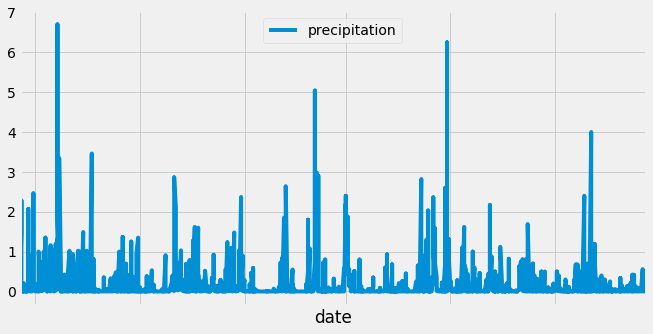

In [218]:
# Use Pandas Plotting with Matplotlib to plot the data
# Sort the dataframe by date
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
# https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
# https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot-in-jupyter-notebook/51174822
df.plot(figsize=(10,6))
# https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(loc='upper center')
ax1 = plt.axes()
ax1.xaxis.set_label_text('date')
#change it to False to hide the label
ax1.xaxis.label.set_visible(True)
#https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
#this is to hide/remove x ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# plt.close()

In [219]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [220]:
# Design a query to show how many stations are available in this dataset?
# https://stackoverflow.com/questions/2175355/selecting-distinct-column-values-in-sqlalchemy-elixir
results = session.query(Measurement.station).distinct().count()
print(results)

9


In [221]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
session.query(Measurement.station, func.count(Measurement.id))\
        .group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [222]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
            .filter(Measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

In [223]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# https://www.tutorialspoint.com/sqlalchemy/sqlalchemy_orm_filter_operators.htm
# filter(Measurement.station == "USC00519281" and Measurement.date >= "2016-08-23").all()
# dont use "and" but use",""
results = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.date >= "2016-08-23").all()
df = pd.DataFrame(results, columns=["tobs"])
df.dropna(inplace=True)
df.describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


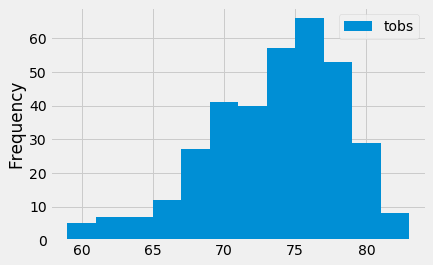

In [224]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting
df.plot(kind="hist", bins=12)


In [225]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-01-01', '2017-01-07'))

[(62.0, 68.36585365853658, 74.0)]


In [226]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

results = calc_temps('2017-01-01', '2017-01-07')
df = pd.DataFrame(results, columns=["tmin","tave","tmax"])
dfMean = df.loc[:,"tave"]
dfMean

0    68.365854
Name: tave, dtype: float64

In [227]:
dfError = (df.loc[:,"tmax"] - df.loc[:,"tmin"])
dfError

0    12.0
dtype: float64

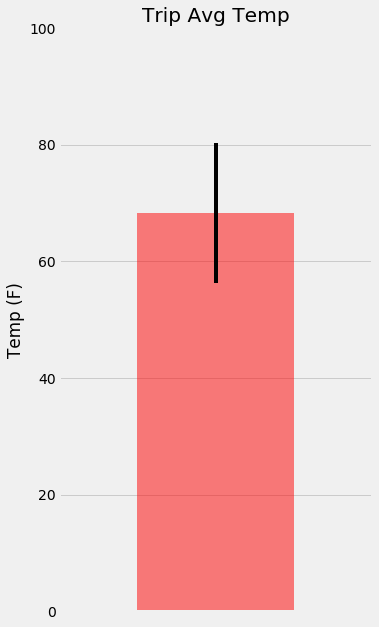

In [228]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# https://stackoverflow.com/questions/26358200/xticks-by-pandas-plot-rename-with-the-string
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting
# https://stackoverflow.com/questions/28398200/matplotlib-plotting-transparent-histogram-with-non-transparent-edge
ax = dfMean.plot(kind="bar", yerr=dfError, yticks=[0,20,40,60,80,100], alpha = 0.5
                 , figsize=(5,10), title="Trip Avg Temp", color='red')
# https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
ax.set_ylabel("Temp (F)")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#change it to False to hide the x grid
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
plt.gca().xaxis.grid(False)

In [236]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
def calc_rain(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        order_by(func.sum(Measurement.prcp).desc()).all()

# function usage example
print(calc_rain('2017-01-01', '2017-01-07'))

[('USC00519523', 0.61), ('USC00514830', 0.6), ('USC00516128', 0.6), ('USC00513117', 0.35), ('USC00519281', 0.2), ('USC00519397', 0.0)]


## Optional Challenge Assignment

In [186]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-02")

[(60.0, 69.39622641509433, 77.0)]

In [195]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


normals = []
# https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
startDate = dt.datetime.strptime("01-01-2018", "%d-%m-%Y")
endDate = dt.datetime.strptime("08-01-2018", "%d-%m-%Y")
date_generated = [startDate + dt.timedelta(days=x) for x in range(0, (endDate-startDate).days)]
myTripDates = []
for date in date_generated:
    myTripDates.append(date.strftime("%y-%m-%d"))
    
# myTripDates = ["2018-01-01","2018-01-02","2018-01-03","2018-01-04","2018-01-05","2018-01-06","2018-01-07"]
for trip in myTripDates:
#     https://stackoverflow.com/questions/26105804/extract-month-from-date-in-python/26105888
    year, month, date = trip.split("-")
    min, avg, max = daily_normals(month+"-"+date)[0]
    normals.append((trip, min, avg, max))

normals

[('18-01-01', 62.0, 69.15384615384616, 77.0),
 ('18-01-02', 60.0, 69.39622641509433, 77.0),
 ('18-01-03', 62.0, 68.9090909090909, 77.0),
 ('18-01-04', 58.0, 70.0, 76.0),
 ('18-01-05', 56.0, 67.96428571428571, 76.0),
 ('18-01-06', 61.0, 68.96491228070175, 76.0),
 ('18-01-07', 57.0, 68.54385964912281, 76.0)]

In [196]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
df = pd.DataFrame(normals, columns =['date','Min', 'Avg', 'Max'])
df.set_index('date', inplace=True )
df

,Min,Avg,Max
date,,,
18-01-01,62.0,69.153846,77.0
18-01-02,60.0,69.396226,77.0
18-01-03,62.0,68.909091,77.0
18-01-04,58.0,70.000000,76.0
18-01-05,56.0,67.964286,76.0
18-01-06,61.0,68.964912,76.0
18-01-07,57.0,68.543860,76.0


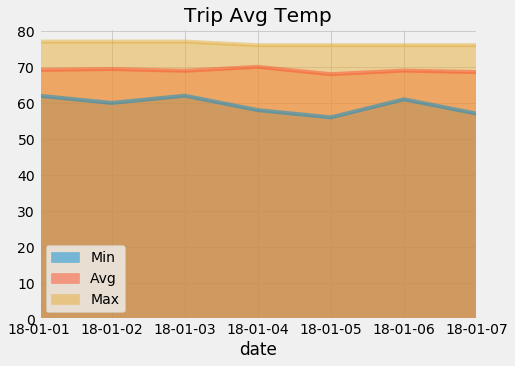

In [198]:
# Plot the daily normals as an area plot with `stacked=False`

ax = df.plot(kind="area", alpha = 0.5
                 , figsize=(7,5), title="Trip Avg Temp", stacked=False)